In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
sns.set()
%matplotlib inline

In [103]:
data = pd.read_csv(r"C:\Users\dell\Downloads\Sales_without_NaNs_v1.3.csv")
data.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007567,74.684767,74.093658,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,Control,High Value,229.685622,270.167701,83.974852,87.738591,Yes


In [14]:
#let's take a look at the data's descriptive statistics
data.describe()

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,203.846220,280.378330,70.249026,73.921449
std,55.431215,85.463933,16.927639,18.185050
min,24.852966,32.414352,22.202441,18.224938
25%,166.610755,221.438134,56.348229,59.866027
50%,203.347924,273.599150,69.644307,73.708858
75%,239.220116,332.376500,83.318174,90.403099
max,545.422547,818.219997,100.000000,100.000000


In [15]:
#Both the mean of sales and the customer satisfaction seem to have increased after the intervention.

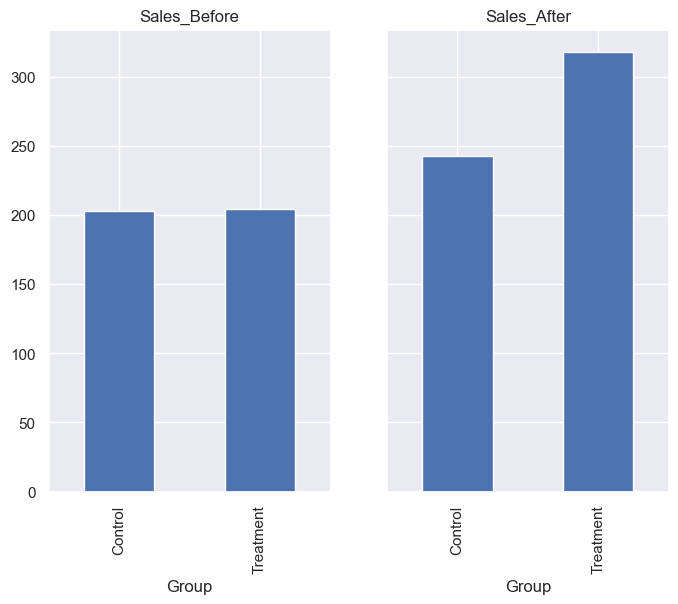

In [59]:
#the differnce between the mean sales of te controled group vs the treatment after and before the intervention.
data.groupby('Group')
fig, ax = plt.subplots(1, 2, figsize=(8,6), sharey=True);
data.groupby('Group')['Sales_Before'].mean().plot(kind='bar', ax=ax[0]);
data.groupby('Group')['Sales_After'].mean().plot(kind='bar', ax=ax[1]);
plt.legend=False
ax[0].set_title('Sales_Before');
ax[1].set_title('Sales_After');


In [17]:
#we see that the mean number of sales increased for both groups after the intervention.
#But the intervention had a higher effect on the treatment group as we can see that their sales had increased more to almost the double.

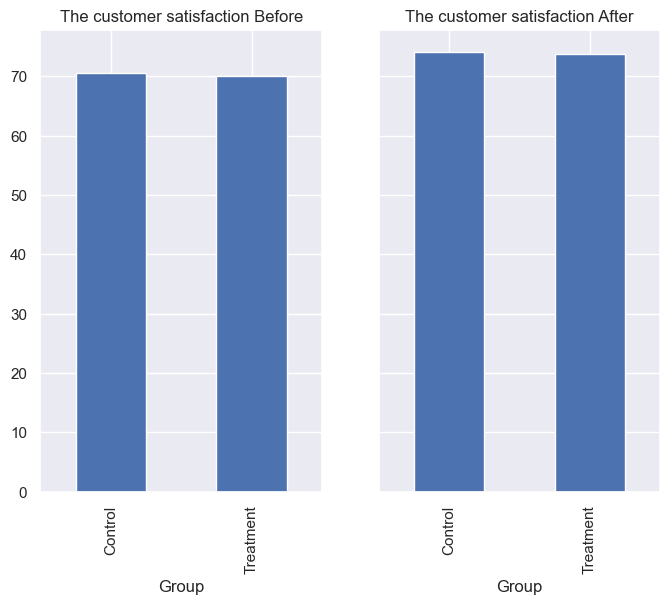

In [58]:
#now we'll do te same thing for customer satisfaction.
fig, ax = plt.subplots(1,2, figsize=(8,6), sharey=True);
data.groupby('Group')['Customer_Satisfaction_Before'].mean().plot(kind='bar', ax=ax[0]);
data.groupby('Group')['Customer_Satisfaction_After'].mean().plot(kind='bar', ax=ax[1]);
ax[0].set_title('The customer satisfaction Before');
ax[1].set_title('The customer satisfaction After');


In [19]:
#we can see that the customer satisfaction increased after the intervention for both groups 
#but there dosn't seem to be any difference in the size of te effect between the groups.

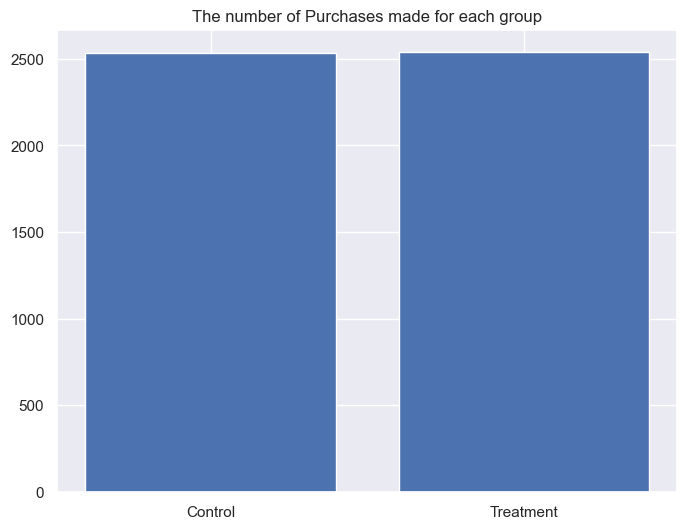

In [52]:
#comparing the difference in purchases made between the two groups.
df = data.copy()
yes_c = df[(df.Group=='Control') & (df['Purchase_Made'] == 'Yes')]['Purchase_Made'].count()
yes_t = df[(df.Group=='Treatment') & (df['Purchase_Made'] == 'Yes')]['Purchase_Made'].count()
plt.figure(figsize=(8,6));
plt.bar(df.Group.unique(), [yes_c, yes_t]);
plt.title('The number of Purchases made for each group');

In [50]:
#We can that the difference between the two groups is very small 6 purchases 
#Wich means that the intervention didn't have any any role in bringing new purchaces.

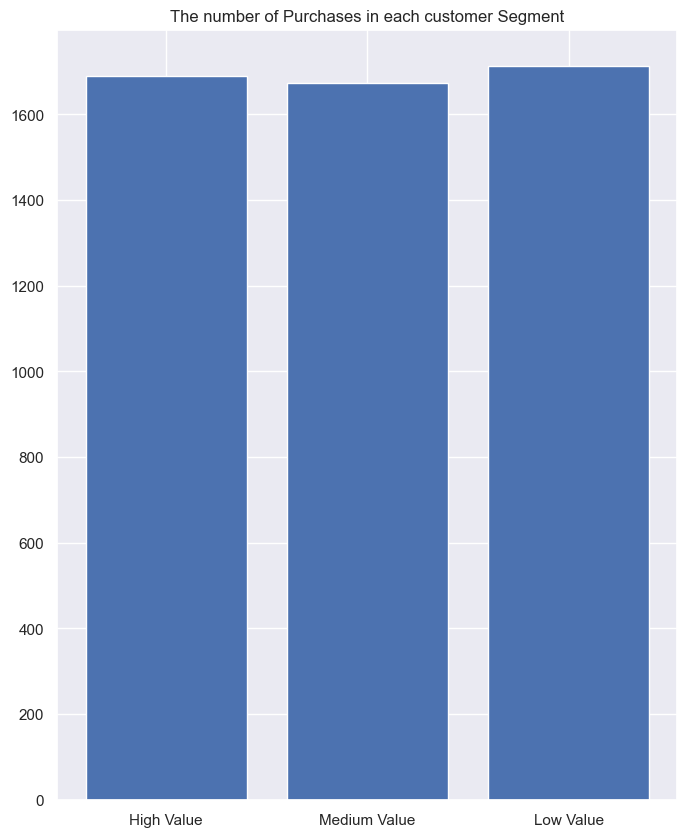

In [101]:

high = df[(df['Purchase_Made']=='Yes') & (df['Customer_Segment']=='High Value')]['Customer_Segment'].count()
medium = df[(df['Purchase_Made']=='Yes') & (df['Customer_Segment']=='Medium Value')]['Customer_Segment'].count()
low = df[(df['Purchase_Made']=='Yes') & (df['Customer_Segment']=='Low Value')]['Customer_Segment'].count()
plt.figure(figsize=(8,10));
plt.bar(df.Customer_Segment.unique(), [high, medium, low]);
plt.title('The number of Purchases in each customer Segment');

In [100]:
#we can see that there is no difference between the segments. 

In [118]:
#Transforming the object type data to codes to use regression on them.
df1 = df.copy()
#columns = ['Group', 'Customer_Segment', 'Purchase_Made']
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].astype('category')
        df1[col] = df1[col].cat.codes

df1.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,0,0,240.548359,300.007567,74.684767,74.093658,0
1,1,0,246.862114,381.337555,100.000000,100.000000,1
2,0,0,156.978084,179.330464,98.780735,100.000000,0
3,0,2,192.126708,229.278031,49.333766,39.811841,1
4,0,0,229.685622,270.167701,83.974852,87.738591,1


In [162]:
#using machin lerning models to predict if there will be a sail or not 

In [163]:
#we first split the data into training and test data. and then we scale it using minmax scaler.
x = df1[['Group', 'Customer_Segment', 'Sales_After', 'Customer_Satisfaction_After']]
y = df1['Purchase_Made']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
scaler = MinMaxScaler()
x_tr_s = scaler.fit_transform(x_train)
x_ts_s = scaler.fit_transform(x_test)

In [170]:
#we'll first use a Logistic regression model
lreg = LogisticRegression(C=100).fit(x_tr_s, y_train)
print(f'the training score: {lreg.score(x_tr_s, y_train)}, The test score: {lreg.score(x_ts_s, y_test)}')

the training score: 0.5090666666666667, The test score: 0.4948


In [165]:
#we can see that both the train and test scores are low wich means this is a bad model.

In [166]:
#now we'll use an SVC model with a linear kernel. 
svc = SVC(kernel = 'linear', C=100).fit(x_tr_s, y_train)
print(f'the training score: {svc.score(x_tr_s, y_train)}, The test score: {svc.score(x_ts_s, y_test)}')

the training score: 0.5096, The test score: 0.5016


In [167]:
#we can see that he result are the same as the logistic regression model.

In [169]:
#now we'll use a nearest neighbor classifier.
knn = KNeighborsClassifier(n_neighbors= 10).fit(x_tr_s, y_train)
print(f'the training score: {knn.score(x_tr_s, y_train)},  The test score: {knn.score(x_ts_s, y_test)}')

the training score: 0.6181333333333333,  The test score: 0.5072


In [171]:
#we got simillare test score on all the models we used wich indicates that
#the data is very simillar and that the features we have don't contribute to the purchasing decision.